In [7]:
import numpy as np
import scipy.io as spio
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Geraldo Teixeira do Nascimento Filho
## Matrícula: 202024740

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [8]:
#Código das funções utilizadas.

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

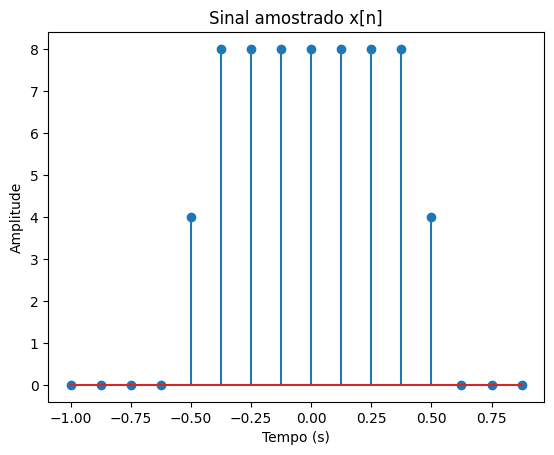

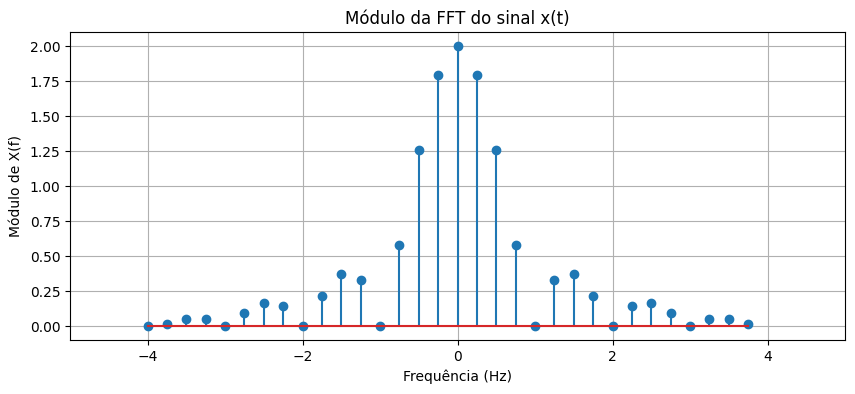

In [17]:

def ret(x):
    return np.where(np.abs(x) > 0.5, 0, np.where(np.abs(x) == 0.5, 0.5, 1))

def x(t):
    return 8 * ret(t)

T = 1/8.0 
t = np.arange(-1, 1, T) 

x_n = x(t)

plt.stem(t, x_n)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal amostrado x[n]')
plt.show()



total_time = 4


t_long = np.arange(-total_time/2, total_time/2, T)


x_long = 8 * ret(t_long)


X = np.fft.fft(x_long)


X = X / len(X)


frequencies = np.fft.fftfreq(len(X), T)


plt.figure(figsize=(10, 4))
plt.stem(frequencies, np.abs(X))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Módulo de X(f)')
plt.title('Módulo da FFT do sinal x(t)')
plt.grid(True)
plt.xlim([-5, 5])
plt.show()

## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

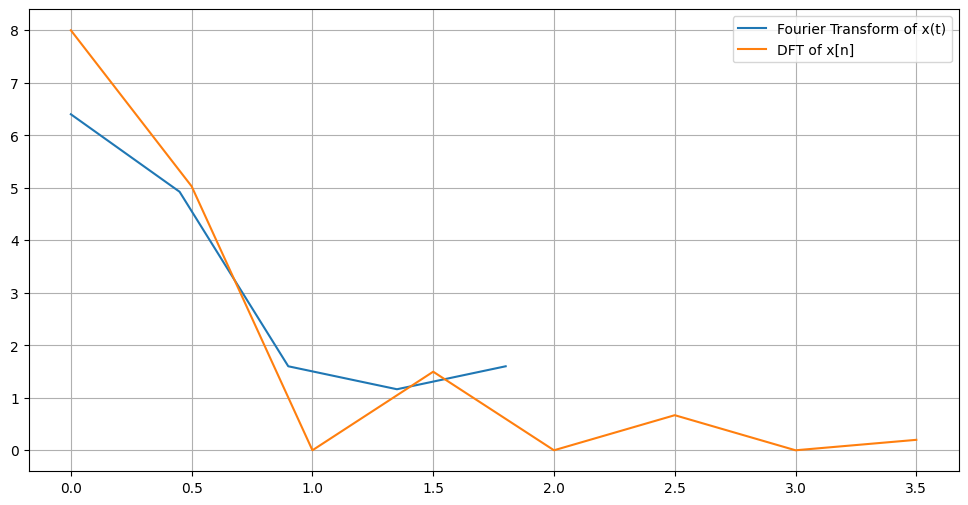

In [18]:
def rect(x):
    return np.where(np.abs(x) < 0.5, 1, np.where(np.abs(x) == 0.5, 0.5, 0))


def x(t):
    return 8 * rect(t)


T = 1/8
t = np.linspace(-1, 1, 10)  
t_sampled = np.arange(-1, 1, T)
x_sampled = x(t_sampled)


N = len(t)
T_high_res = t[1] - t[0]
xf_high_res = fftfreq(N, T_high_res)[:N//2]
yf_high_res = fft(x(t))[:N//2]


N_sampled = len(t_sampled)
xf_sampled = fftfreq(N_sampled, T)[:N_sampled//2]
yf_sampled = fft(x_sampled)[:N_sampled//2]


plt.figure(figsize=(12,6))
plt.plot(xf_high_res, 2.0/N * np.abs(yf_high_res), label='Fourier Transform of x(t)')
plt.plot(xf_sampled, 2.0/N_sampled * np.abs(yf_sampled), label='DFT of x[n]')
plt.legend()
plt.grid(True)
plt.show()

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

In [15]:
#Resposta da questão 2a

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

In [ ]:
#Resposta da questão 2b

## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


In [ ]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [ ]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()
